<a href="https://colab.research.google.com/github/caioj/QuarentenaDados/blob/master/QuarentenaDados1_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios 1º dia da Quarentena de Dados Alura

Aqui vão a resposta dos Desafios propostos no primeiro dia da **Quarentena Dados** da Alura, usamos os datasets do MovieLens, site que tem a finalidade receber notas dos filmes lançados ao longo dos anos.
O DataSet usado é a versão para estudos, ou seja, tem menos dados que a versão original zipada que pode chegar até 1gb e ocuparia bastante memória no notebook.

In [0]:
# Imports
import pandas as pd
import numpy as np

In [30]:
# Carregando os Datasets
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_medias_por_filme = avaliacoes['nota'].mean()


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.


In [5]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.columns = ['filmeId', 'titulo', 'genero', 'media'] 
filmes_com_media.sort_values('media', ascending=False)


,filmeId,titulo,genero,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [6]:
filmes_com_media.isnull().sum()

filmeId     0
titulo      0
genero      0
media      18
dtype: int64

Contagem das atibuições "NaN" usando a função isnull() "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html"

In [7]:
filmes_com_media.media.isnull().sum()

18

Contagem das atribuições 'NaN' em uma coluna específica "media", usando o método isnull()

In [10]:
#filmes_nao_avaliados_indexados = [i for i, e in enumerate(filmes_com_media['media'].isnull()) if e == True]
[i for i, e in enumerate(filmes_com_media['media'].isnull()) if e == True]

[816,
 2211,
 2499,
 2587,
 3118,
 4037,
 4506,
 4598,
 4704,
 5020,
 5293,
 5421,
 5452,
 5749,
 5824,
 5837,
 5957,
 7565]

Lista referente ao index dos 18 filmes não contem avaliação "NaN"

In [11]:
filmes_nao_avaliados_indexados =  [i for i, e in enumerate(filmes_com_media['media'].isnull()) if e == True]

for i, v in enumerate(filmes_com_media['titulo']):
  if i in filmes_nao_avaliados_indexados:
    print(i, v)

816 Innocents, The (1961)
2211 Niagara (1953)
2499 For All Mankind (1989)
2587 Color of Paradise, The (Rang-e khoda) (1999)
3118 I Know Where I'm Going! (1945)
4037 Chosen, The (1981)
4506 Road Home, The (Wo de fu qin mu qin) (1999)
4598 Scrooge (1970)
4704 Proof (1991)
5020 Parallax View, The (1974)
5293 This Gun for Hire (1942)
5421 Roaring Twenties, The (1939)
5452 Mutiny on the Bounty (1962)
5749 In the Realms of the Unreal (2004)
5824 Twentieth Century (1934)
5837 Call Northside 777 (1948)
5957 Browning Version, The (1951)
7565 Chalet Girl (2011)


Comparação entre o index da lista de filmes total com a lista de filmes que não possuem avaliação. Devolvendo o index eo 'v' valor referente ao título do filme que está presente na lista de não avaliados.

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [12]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
num_avaliacoes_por_filme = avaliacoes.groupby('filmeId').size()
num_avaliacoes_por_filme.name = 'Num_Avaliacao'
filmes_com_media_avaliacao = filmes_com_media.join(num_avaliacoes_por_filme, on='filmeId')
filmes_com_media_avaliacao

,filmeId,titulo,genero,media,Num_Avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [14]:
filmes_com_media_avaliacao['media'] = filmes_com_media_avaliacao['media'].round(2)
filmes_com_media_avaliacao

,filmeId,titulo,genero,media,Num_Avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [18]:
filmes_com_media_avaliacao['genero'].str.split(pat = "|")

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genero, Length: 9742, dtype: object

In [19]:
generos = filmes_com_media_avaliacao['genero'].str.split(pat = "|")
#np.concatenate(generos)
list(set(np.concatenate(generos)))

['IMAX',
 '(no genres listed)',
 'Film-Noir',
 'Drama',
 'Thriller',
 'War',
 'Mystery',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Musical',
 'Fantasy',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Children',
 'Western',
 'Horror',
 'Documentary']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [20]:
genero_listado = pd.Series(np.concatenate(generos)).value_counts()
pd.Series(np.concatenate(generos)).value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

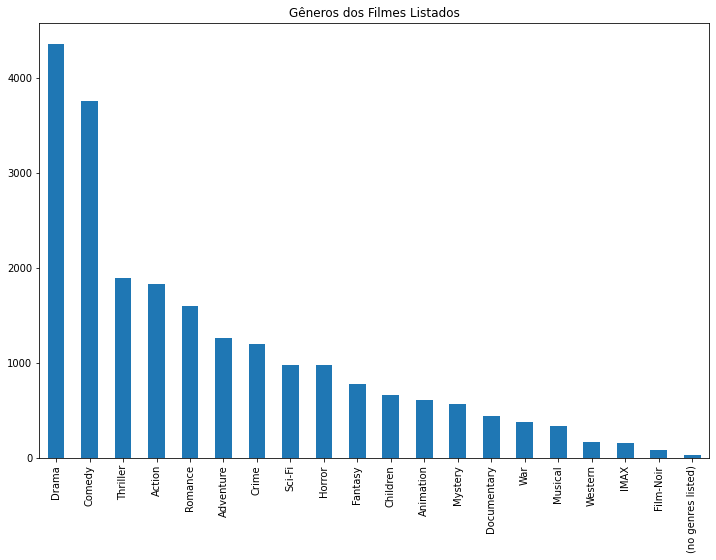

In [28]:
genero_listado.plot(kind='bar', title='Gêneros dos Filmes Listados', figsize=(12,8))